# Basics of Machine Learning
The purpose of this notebook will be to develop a high level and abstract understanding of machine learning, and, learn some of the terms that we shall frequently encounter all throughout machine learning.<br>

## Machine Learning
Machine learning is essentially a form of applied statistics where computers are used to statistically estimate complicated functions, without being explictly programmed. It involves the study and constructions of algorithms that can learn from and make predictions on data. The structuring of data that is to be the input for an algorithm is also a crucial part of machine learning.<br>

## Learning Algorithms
A computer program is said to learn from `experience E` with respect to some `task T` and some `performance measure P`, if its performance on `T`, as measured by `P`, improves with experience `E`.<br>

Machine learning tasks are usually described in terms of how a machine learning system should process an `example`. An example can be thought of as a set of `features` that have been quantitatively measured from some object that we want our machine learning system to process.

## Uses of Machine Learning
1. Problems that require a lot of hand tuning and have hard to maintain code, which can be simplified and outperformed.
2. Complex problems for which no traditional solutions exist.
3. Fluctuating environments, since machine learning can adapt to new data.
4. Getting insights into more complex problems and large amounts of data.

## Types of Machine Learning Systems
### Supervised Learning
The training data fed to the algorithm contains solutions called, `labels`. A typical supervised learning task is `classification`, which is trained on many emails with their `class` (i.e spam or not spam). In this, the machine learning algorithm outputs which of *k* categories some input belongs to.<br>

Another typical task is to predict a `target` numeric value such as the price of a car from a given set of features called `predictors`. This sort of a task is called `regression`. To train the system, we pass many `examples`, that are, sets of features of the object being processed, including both the predictors and the labels. Some regression algorithms can also be used for classification, like, `Logistic Regression` can output the probability distribution over classes.<br>

Some supervised learning algorithms:
1. k-Nearest Neighbours
2. Linear Regression
3. Logistic Regression
4. Support Vector Machines (SVMs)
5. Some types of Neural Networks

### Unsupervised Learning
Training on `unlabeled` data. The algorithm itself finds structure in the data. Some unsupervised learning algorithms:
1. **Clustering:** `k-Means`, `Hierarchical Cluster Analysis`, `Expectation Maximization`. These help us detect groups of similar obejcts.
2. **Visualization and Dimensionality Reduction:** `Principal Component Analysis (PCA)`, `Kernel PCA`, `Locally-Linear Embedding (LLE)`, `t-distributed Stochastic Neighbour Embedding (t-SNE)`. This can involve tasks like `dimensionality reduction`, in which the goal is to simplify data without losin information. One way to do it is `feature extraction`, in which we merge several corelated features into one.
3. **Association rule learning:** `Apriori`, `Eclat`. This involves finding relations between different attributes of our data.
4. **Anomaly detection** is yet another unsupervised learning task, it enables us to remove outliers from a dataset before feeding it to a supervised learning algorithm.<br>

### Semisupervised Learning
Algorithms dealing with partially labeled data. Example: Google Photos, the clustering algorithm differentiates people and the name we assign to faces is the label to that particular cluster. `Deep Belief Networks (DBNs)` are based on unsupervised components called `Boltzmann machines (RBMs)`, stacked on top of one another. First the RBMs are trained sequentially using unsupervised data and then the whole system is fine tuned using supervised data.

### Reinforcement Learning
The learning system is called an `agent`. It can observe the environment, select and perform actions and get `rewards` in return (or `penalties` in the form of negative rewards). It must then, learn by itself what is the best strategy, called a `policy`, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation. Example: Robots use reinforcement learning to learn how to walk, AlphaGo.

### Batch Learning
In `Batch Learning`, the system is incapable of learning incrementally, it must be trained using all the available data. This takes a lot of time and computational resources and is generally done offline. Training a new version of the model means training again from scratch. Not feasible to be used where computational resources are limited and there is a lot of new data to be trained on at high frequency. The advantage of these systems lies in their robustness to bad data.

### Online Learnning
In this method, the system is trained by feeding it data instances sequentially, either individually or by small groups called `mini-batches`. This is a fast process and thus allows a system to learn about the data on the fly. Online learning is great for systems that recieve data as a continous flow and need to adapt to change rapidly or autonomously. Online learning algorithms cal also be used to train systems on huge datasets that cannot fit in the main memory (`out-of-core learning`). `Learning rate` is the parameter that helps determine how fast the system can adapt to changing data. A system with high learning rate will rapidly adapt to new data, but will also quickly forget old data. This makes these systems vulerable to bad data.

### Instance-Based Learning
Simplest form of learning that means learning by heart. It works on the concept of `generalizing by similarity measure`. Example: Having common words with spam email could be a similarity mearsure for a spam filter. `k-Nearest Neighbours` is a good example of an instance based learning algorithm. 

### Model-Based Learning
In this, we `generalize by a perdiction model` that is constrcuted using examples from the data set. Example: `Linear Regression`. The performance of these predicions is measured as a `fitness function` or a `cost function`.

## Example 1.1: Best Life Index and GDP per Capita
We shall now demonstrate the working of two machine learning models, namely, `Linear Regression` and `K-Nearest Neighbours` on a given data set. In this example, we are given two data sets containing details about the *best life index* and *gdp per capita* of different countries along with other information. 

In [18]:
# A Utility import for setting paths to our data set.
import os

# For our machine learning models: Linear Regression, K-Nearest Neighbours.
import sklearn.linear_model
import sklearn.neighbors

# matplotlib for visualizing data and seaborn for pretty plots.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# For the relavent data structures and their manupulation.
import numpy as np
import pandas as pd

# For inline plots as opposed to a window popping up.
%matplotlib inline

# Setting default settings for seaborn.
sns.set()

In [19]:
# Constructing a path to our data set.
data_path = os.path.join("datasets", "lifesat", "")

In [20]:
# Loading .csv data as pandas DataFrames.
best = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp  = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',', 
                   delimiter='\t', encoding='latin1', na_values="n/a")

In [21]:
# We use this function to structure our data.
# +----------------------------------------------------------+
# | parameter | type             | Comment                   |
# +----------------------------------------------------------+
# | best      | pandas DataFrame | Best life index data set. |
# | gdp       | pandas DataFrame | GDP per capita data set.  |
# -----------------------------------------------------------+
def prepare_data(best, gdp):
    
    # Only those rows of our DataFrame where the column "INEQUALITY" has the value "TOT"
    best = best[best["INEQUALITY"]=="TOT"]
    
    # Pivoting about the column "Country", and setting the pivot table's coulmns as values of the column "Indicator".
    # We then fill in the values in a row major format with the help of the column "Values".
    best = best.pivot(index="Country", columns="Indicator", values="Value")
    
    # Renaming the column, the parameter inplace lets us change the same object.
    gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
    
    # DataFarme.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)
    # keys : column label or list of column labels/arrays.
    # drop: delete columns to be used a new index
    # append: append columns to the existing index.
    # It is used to set row labels using one or more existing columns.
    # We can have multi-index values.
    gdp.set_index("Country", inplace=True)
    
    # pd.merge() how: {left, right, inner, outer} default is inner.
    # left, right: Take DataFrames.
    # Equivalent to the RDBMS inner join.
    stats = pd.merge(left=best, right=gdp, left_index=True, right_index=True)
    
    # DataFrame.sort_values()
    # by: column name
    # axis: 0 for 'index', 1 for 'columns'
    # ascending: True (default)
    # kind: {'quicksort', 'mergesort', 'heapsort'}
    stats.sort_values(by="GDP per capita", inplace=True)
    
    # Some additional data cleaning operations.
    # Removing certain indices from data.
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    # DataFrame.iloc[] purely integer based location indexing.
    return stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [22]:
# Prepare the data
country_stats = prepare_data(best, gdp)

# np.c_ Translates slice objects to concatenation along the second axis.
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

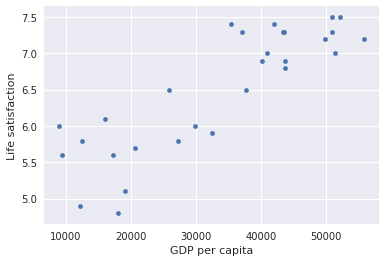

In [23]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [24]:
# Select a linear model for model based learning.
model = sklearn.linear_model.LinearRegression()

# For Instance Learning, we can choose:
# model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [25]:
# Curve fitting based on the model we choose.
model.fit(x, y)

# Make a prediction for Cyprus, given GDP per capita: 22587
gdp_cyprus = [[22587]]

# linear_model.predict(x)
# x: array-like or sparse matrix, shape= (n_samples, n_features) 
print(model.predict(gdp_cyprus))

[[5.96242338]]


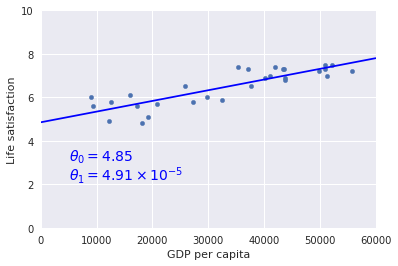

In [26]:
# These are the parameters of our linear model, c(theta0): y-intercept, m(theta1): slope
c, m = model.intercept_[0], model.coef_[0][0]

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])

# np.linspace(start, end, number) generates number of evenly spaced values in the interval [start, end]
x = np.linspace(0, 60000, 1000)

# Plotting the Linear Equation.
plt.plot(x, m * x + c, "b")

# Displaying the optimal parameters for linear regression.
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()


## Main Challenges of Machine Learning
1. **Insufficient training data:** Not exnough examples to learn from. The `Unreasonable Effectiveness of Data` states that given enough data, different machine learning algorithms all perform identically well on the complex problem of `natural language disambiguation`. The idea being that we cannot neglect the importance of data and just focus on the algorithms.
2. **Nonrepresentative Training Data:** It is crucial for your data to be representative of the examples you want to generalize to. Two of the main difficulties here are `sampling noise` when the data set is too small and `sampling bias` when the data set is too large.
3. **Poor Quality Data:** This involves `missing values`, `errors`, `outliers` and `noise`. Which need to be removed or corrected.
4. **Irrelevant Features:** The process of `feature engineering` involves coming up with a good set of features to train on, it has two parts: `feature selection` i.e selecting the most useful features among the existing features to train on, and, `feature extraction` i.e combining features to produce a more useful single feature. (dimensionality reduction algorithms can help)
5. **Overfitting the Training Data:** It referes to `over generalization`, meaning the model performs well on the training set but not on the test set. When our data is noisy, complex models like Deep Neural Nets, that can detect subtle patterns, start finding them in the noise itself. Example: In the above example if we add name as a predictor, we get that countries with the letter `w` have better life index but this does not generalize to lets say countries like Zimbabwe. To remove overfitting, we can select a simpler model ex. linear vs high degree polynomial, remove noise or get more data. Constraining a model to mae it simpler and reduce the risk of overfitting is known as `regularization`. The amount of regularization we apply is controled using a `hyperparameter`. It is not affected by the algorithm itself, but must be set prior to the training.
6. **Underfitting the Training Data:** This is the exact opposite of overfitting and happens when our model is to simple so as to learn the underlying structure of data. This can be resolved by: selecting a more powerful model, selecting more features, reducing constraints on our model (reducing the hyperparameter).

## Testing and Validating
We split our data set into the `test set` and the `training set` (`80%` and `20%`). As the names imply, the model is trained on the training set and tested on the test set. The error raate on new cases is called the `generalization error` (or `out of sample error`). If the training error is low and the generalization error is high, it indicates that the model is overfitting.<br>

Another common practice is to split the training data into sever sub-sets. The models are trained over different combination of these subsets while keeping the remaining sets for `validation`. After a good measure of accuracy is achieved through `validation testing`, we finally subject our model to the test set. This technique is known as `cross-validation`.

## No Free Lunch Theorem
A `model` is a simplified version of observations. This is done by only taking the `essential features` of our data. This is where we have to make `assumptions`. Example: We assume that the data is linear when we choose a linear model. The NFL theorem states that when there are no assumptions made about the data, there is no reason to prefer one data model over another. There is no model that is *a priori* guaranteed to work better. The only way to know is to evaluate each and every method, but since that is not feasible, we must make good assumpions about our data and evaluate only a few reasonable models.